In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Cargar el conjunto de datos de Boston
boston_dataset = fetch_california_housing()
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

# Mostrar las primeras filas del conjunto de datos
print(data.head())

# Descripción del conjunto de datos
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

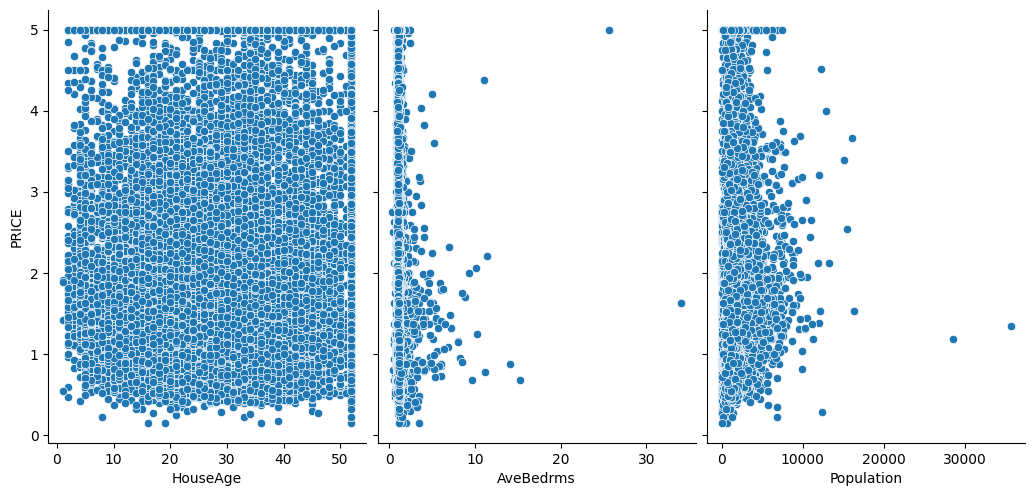

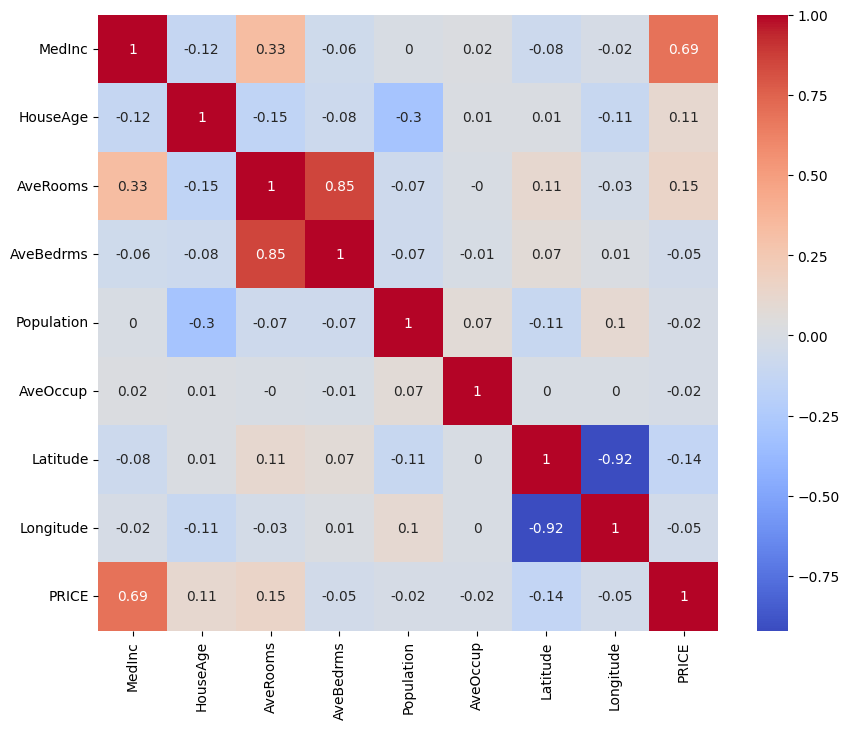

In [3]:
# Mostrar el par de gráficos para ver relaciones entre variables
sns.pairplot(data, x_vars=['HouseAge', 'AveBedrms', 'Population'], y_vars='PRICE', height=5, aspect=0.7)
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [4]:
# Selección de características y variable objetivo
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]  # Puedes añadir más características
y = data['PRICE']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")


Coeficientes: [ 5.46160779e-01  1.67879091e-02 -2.23919944e-01  1.11549261e+00
  2.31671974e-05 -4.61823135e-03]
Intercepto: -0.5528727644616485


In [6]:
# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
print(f"Error Cuadrático Medio (MSE) en entrenamiento: {mean_squared_error(y_train, y_train_pred)}")
print(f"Error Cuadrático Medio (MSE) en prueba: {mean_squared_error(y_test, y_test_pred)}")
print(f"Coeficiente de determinación (R^2) en entrenamiento: {r2_score(y_train, y_train_pred)}")
print(f"Coeficiente de determinación (R^2) en prueba: {r2_score(y_test, y_test_pred)}")


Error Cuadrático Medio (MSE) en entrenamiento: 0.6070093832609208
Error Cuadrático Medio (MSE) en prueba: 0.6421872314534843
Coeficiente de determinación (R^2) en entrenamiento: 0.5459161602818385
Coeficiente de determinación (R^2) en prueba: 0.5099337366296436


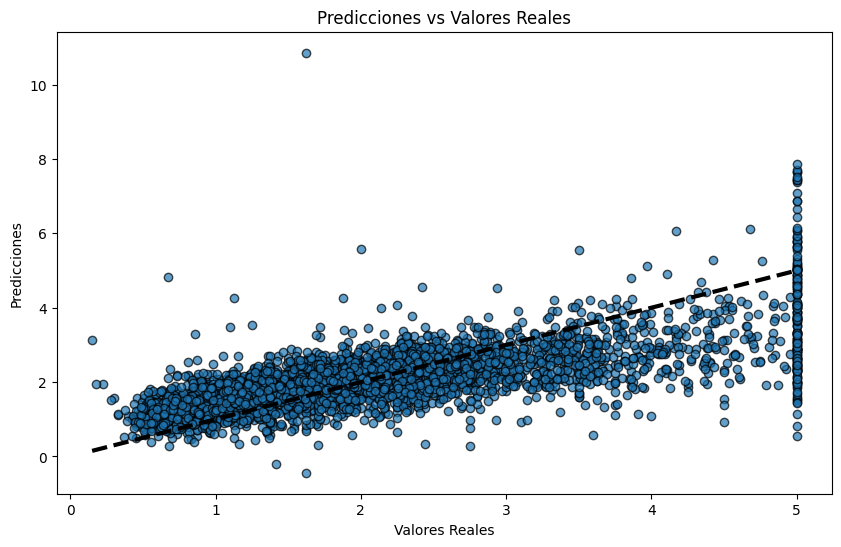

In [7]:
# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()
